In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 250})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
import ast
from collections import Counter

In [2]:
data = pd.read_csv('FINAL_ARXIV_2025_with_affiliations.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['galaxy evolution', 'machine learning', 'meta..."
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...","['accretion', 'black holes', 'x-rays']"
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[]
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['star clusters', 'supernova remnants']"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['hydrodynamical simulations']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[]
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']","['active galactic nuclei', 'agn', 'black holes']"
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']","['dark energy', 'quasars']"
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling flows', 'MHD', 'Plasma physics']",['magnetic reconnection']


In [4]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [5]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['keywords'] = data['keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['keywords'] = data['keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['keywords'] = data['keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['keywords'] = data['keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['keywords'] = data['keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['keywords'] = data['keywords'].str.replace(':', '', regex=False)

# Separate keywords by sploitting according to ' – ' delimiter
data['keywords'] = data['keywords'].str.replace(' — ', ', ')

In [6]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,month
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['galaxy evolution', 'machine learning', 'meta...",1
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...","['accretion', 'black holes', 'x-rays']",1
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],1
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['star clusters', 'supernova remnants']",1
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['hydrodynamical simulations'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[],12
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']","['active galactic nuclei', 'agn', 'black holes']",12
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']","['dark energy', 'quasars']",12
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling flows', 'MHD', 'Plasma physics']",['magnetic reconnection'],12


In [7]:
# Set empty keywords to NaN
data['keywords'] = data['keywords'].replace('', np.nan)

# Print number of papers with keywords
print(f"Number of papers with keywords: {data['keywords'].notna().sum()}")

Number of papers with keywords: 12550


In [8]:
# Percentage of sample with keywords
percentage_with_keywords = (data['keywords'].notna().sum() / len(data)) * 100
print(f"Percentage of sample with keywords: {percentage_with_keywords:.2f}%")

Percentage of sample with keywords: 68.44%


In [10]:
# Replace same term short forms
data['keywords'] = data['keywords'].str.replace('agn', 'active galactic nuclei', regex=False)
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)
data['keywords'] = data['keywords'].str.replace('black hole physics', 'black holes', regex=False)
data['keywords'] = data['keywords'].str.replace('stars binary', 'binary', regex=False) 
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)

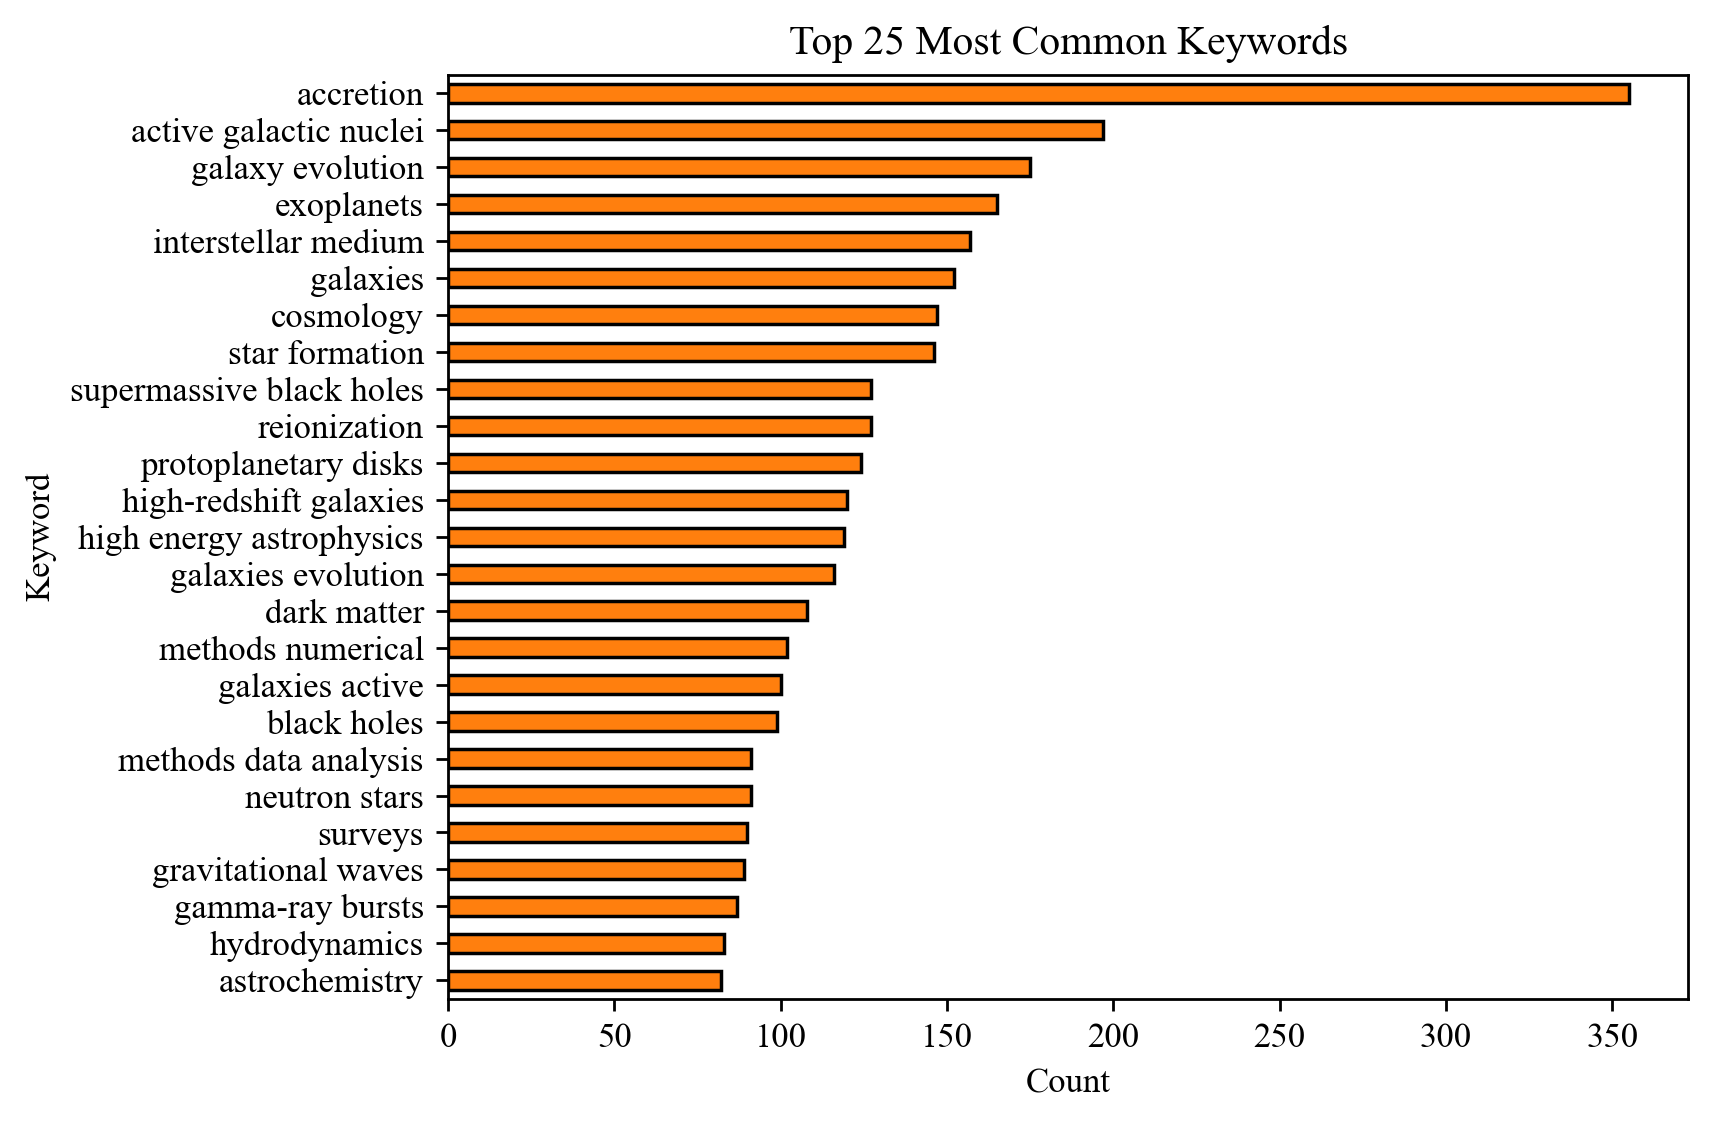

In [20]:
# Most common keywords
all_keywords = []
for keywords in data['keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Top 100 keywords
top_100_keywords = dict(keyword_counts.most_common(1000))

# Print only the keywords
for keyword in top_100_keywords.keys():
    print(keyword)

# Save to .dat file
# with open('top_500_keywords.dat', 'w') as f:
#     for keyword in top_100_keywords.keys():
#         f.write(f"{keyword}\n")

accretion
active galactic nuclei
galaxy evolution
exoplanets
interstellar medium
galaxies
cosmology
star formation
supermassive black holes
reionization
protoplanetary disks
high-redshift galaxies
high energy astrophysics
galaxies evolution
dark matter
methods numerical
galaxies active
methods data analysis
neutron stars
surveys
gravitational waves
gamma-ray bursts
hydrodynamics
astrochemistry
spectroscopy
binary stars
black hole physics
supernovae
dwarf galaxies
hydrodynamical simulations
black holes
galaxy formation
magnetic fields
galaxies high-redshift
galaxy clusters
accretion disks
cosmic rays
quasars
exoplanet atmospheres
planet formation
machine learning
radiative transfer
radio transient sources
astronomy data analysis
x-rays binaries
radio astronomy
white dwarf stars
stars neutron
brown dwarfs
galaxies formation
stellar evolution
nucleosynthesis
x-ray astronomy
solar corona
solar flares
dust
extinction
catalogs
methods statistical
sky surveys
galaxy structure
time domain astr

In [21]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords'] = data['smart_keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(':', '', regex=False)

In [22]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(':', '', regex=False)

In [23]:
# Replacement dictionary
replacement_dict = {
    'agn': 'active galactic nuclei',
    'black hole physics': 'black holes',
    'black hole': 'black holes',
    'exoplanet' : 'exoplanets',

}

for short_form, full_form in replacement_dict.items():
    data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(rf'\b{short_form}\b', full_form, regex=True)

In [25]:
# Remove empty smart keywords 
data['smart_keywords_2'] = data['smart_keywords_2'].replace('', np.nan)

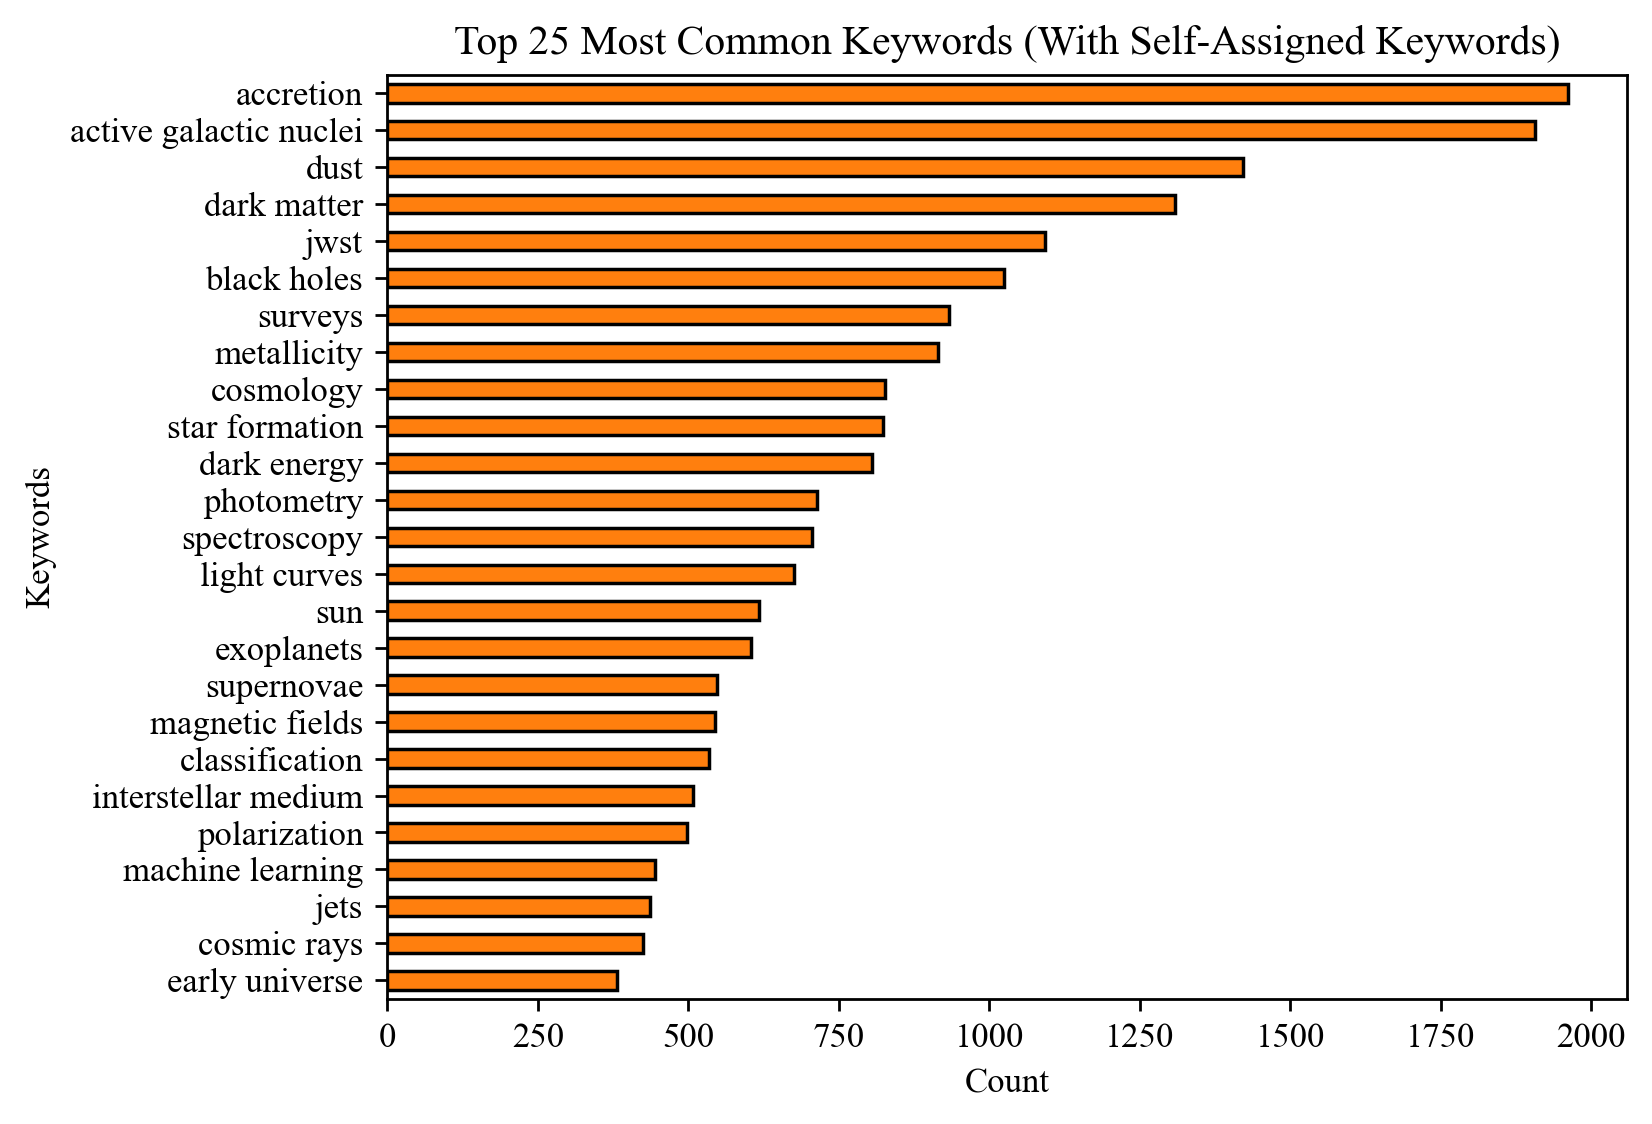

In [28]:
# Most common keywords
all_keywords = []
for keywords in data['smart_keywords_2'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords (With Self-Assigned Keywords)')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.gca().invert_yaxis()
plt.show()

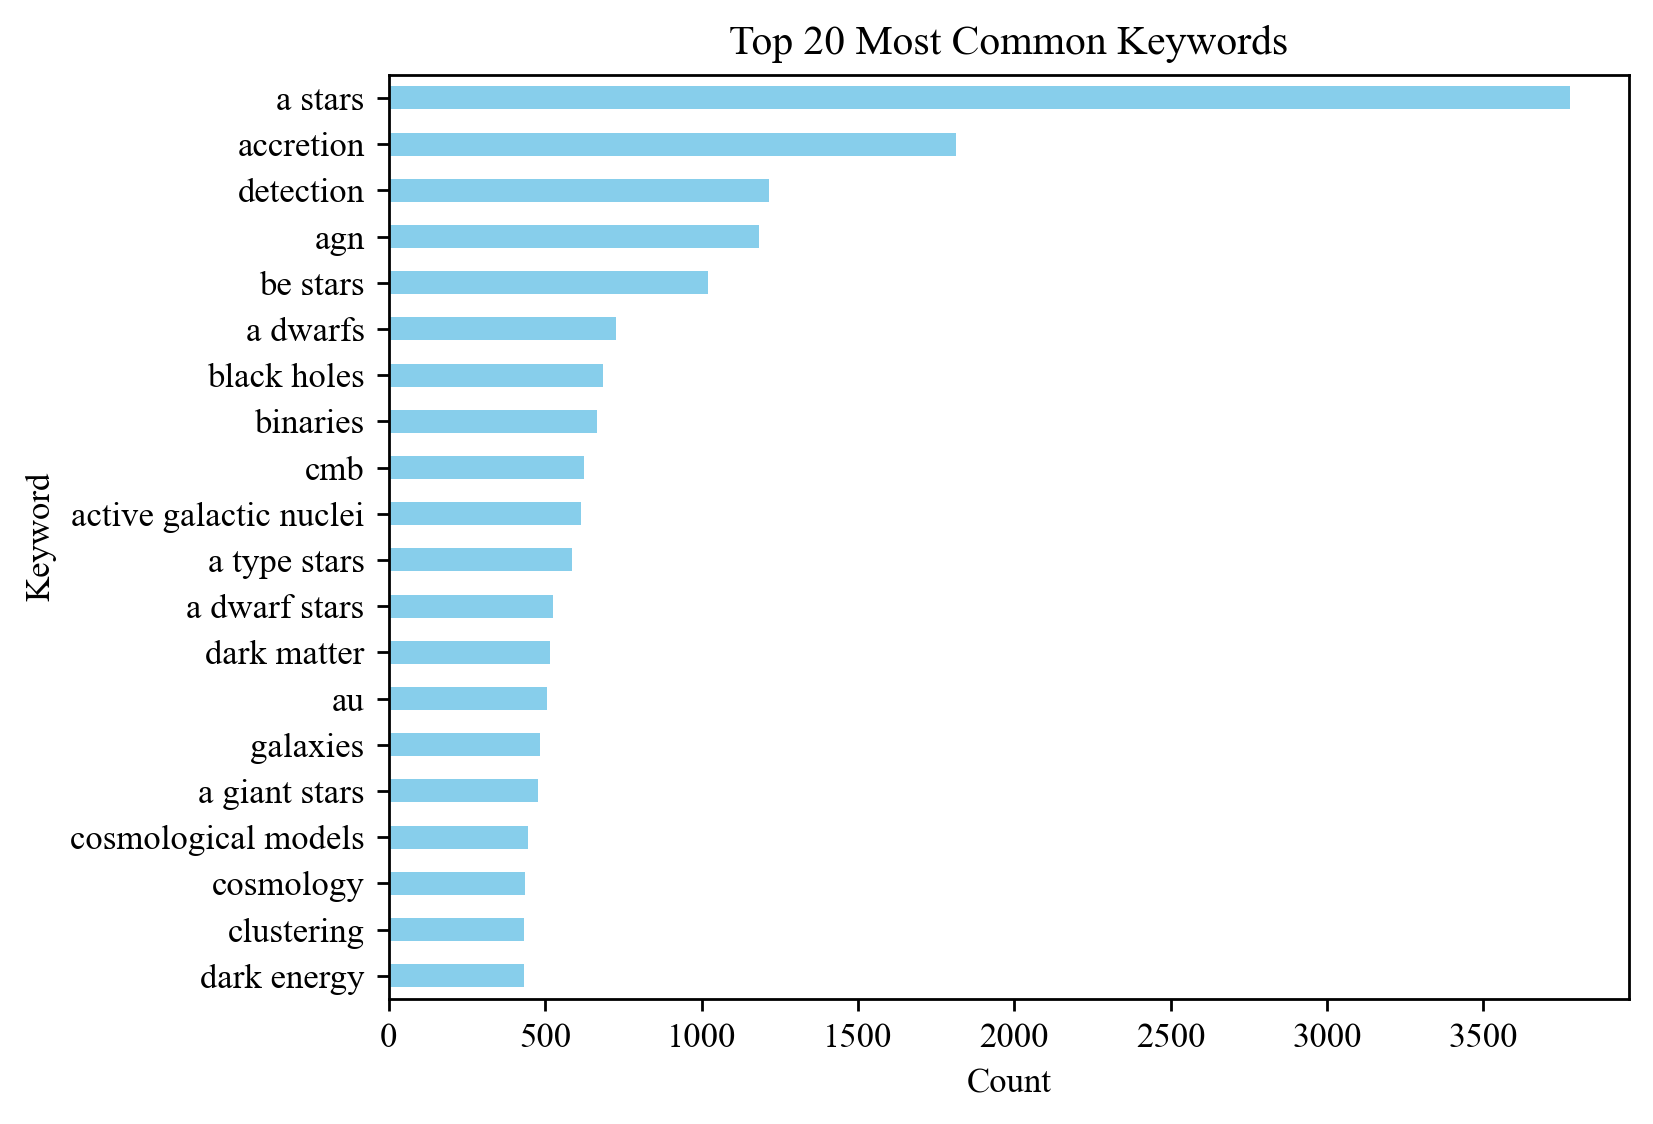

In [86]:
# Most common keywords
all_keywords = []
for keywords in data['smart_keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(20)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Most Common Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()
plt.show()